# Python aplicado a la Ingeniería
## Módulo 1
### ***Alumna:***  Caamiña Daniela
### ***DNI:*** 37665938
### ***Carrera:*** Ingeniería Electrónica
### ***Observaciones:*** 
*   El problema de Greed no pude hacerlo con menos código.

# Triangle project
Este ejercicio debe pasar dos sets de pruebas, el primero de ellos verificará si la función puede clasificar triángulos, mientras que el otro set evalúa la robustez ante triangulos ilegales.

In [ ]:
def triangle(a, b, c):
  """Triangle es una funcion que analiza las longitudes de los lados de un triángulo
  (representados por a, b y c) y devuelve el tipo de triangulo.
      La salida es:
        'equilatero'  si todos los lados son iguales
        'isosceles'   si dos lados son iguales
        'escaleno'     si todos los lados son distintos
  """
# BORRAR "PASS" Y ESCRIBIR EL CÓDIGO DEBAJO DE ESTA LINEA PARA RESOLVER EL PROBLEMA
# 
  if a<=0 or b<=0 or c<=0:
    raise TriangleError #con un lado <= 0 no es posible hacer un triangulo
  elif a<=(b+c) and b<=(c+a) and c<=(a+b): #propiedad de los triangulos, la suma de dos lados debe ser mayor o igual al valor del lado faltante
    #if a==b and b==c and a==c:
    if a==b==c:
      return "equilatero"
    elif a==b or b==c or a==c:
      return "isosceles"
    else:
      return "escaleno"
  else:
    raise TriangleError
       
# ESTO NO HAY QUE CAMBIARLO
class TriangleError(Exception):
  pass


### Primer problema (2 puntos)
Editar el código de la función anterior para que pase las siguientes pruebas:

In [ ]:
assert('equilatero' == triangle(2, 2, 2))
assert('equilatero' == triangle(10, 10, 10))
assert('isosceles' == triangle(3, 4, 4))
assert('isosceles' == triangle(4, 3, 4))
assert('isosceles' == triangle(4, 4, 3))
assert('isosceles' == triangle(10, 10, 2))
assert('escaleno' == triangle(3, 4, 5))
assert('escaleno' == triangle(10, 11, 12))
assert('escaleno' == triangle(5, 4, 2))

*El código debe correr sin mostrar "AssertionError"*
### Segundo problema (1 punto)
Se verificará el código con triángulos ilegales. Mejorá el código de la función triangle para que llame a la función TriangleError en caso de que se haya ingresado los parámetros de un triángulo ilegal.

*AYUDA* recordá el uso de la instrucción "raise"

In [ ]:
count = 0
try:
  # los lados de un triángulo deben ser mayores a cero
  var = triangle(1.0, 0, 0)
except TriangleError:
  count += 1
try:
  # se debe cumplir el teorema de pitágoras
  var = triangle(1, 1, 7)
except TriangleError:
  count += 1
try:
  var = triangle(1, 7, 1)
except TriangleError:
  count += 1
try:
  var = triangle(7, 1, 1)
except TriangleError:
  count += 1
try:
  var = triangle(0, 0, 0)
except TriangleError:
  count += 1
try:
  var = triangle(1, 1, -1)
except TriangleError:
  count += 1
try:
  var = triangle(1, 1, 5)
except TriangleError:
  count += 1
assert(count == 7)

*El código debe correr sin mostrar "AssertionError"*
# Dice project
Estamos comenzando a desarrollar un juego de la Generala y necesitamos hacer algunas verificaciones, debemos tener en cuenta que un cubilete es un objeto y los 5 dados en su interior serán quienes obtengan un valor en cada lanzamiento. No te olvides que es un juego de azar, y para esto podemos importar un paquete que contenga la funcion random.


In [ ]:
 #importar random

import random ####ESTO AGREGUÉ

class DiceSet:
    def __init__(self):
        self._values = None

    @property
    def values(self):
      return self._values

    def values_set(self, new_values):
      self._values = new_values
  
    def roll(self, n):
        # Falta implementar, debe tirar n dados.
        # Recordá que la función random.randint(min, max) puede ser utilizada para generar numeros aleatorios
        # Empezá a escribir tu código debajo de esta línea
      self._values = [] #la lista es con []
      i=0
      while i != n:
        valor= random.randint(1, 6)
        self._values.append(valor) #append es para ir agregando elemento al final de la lista
        i += 1
        

### Tercer problema (2 puntos)
Este set verificará si los dados son lanzados y si cada uno de ellos tiene un valor dentro de una lista

In [ ]:
dice = DiceSet()
assert(dice)
#lanzo 5 dados
dice.roll(5) 
dice.values 
if not isinstance(dice.values, list):
  raise Exception("debería ser una lista")
assert(5 == len(dice.values))
for value in dice.values:
    if 1 <= value <= 6:
      continue
    raise Exception(f"El valor {str(value):s} debe estar entre 1 y 6")
#lanzo 3 dados
dice.roll(3)
assert(3 == len(dice.values))
#lanzo 1 dado
dice.roll(1)
assert(1 == len(dice.values))
#hago dos lanzamientos y veo si son distintos
dice.roll(5)
first_time = dice.values
dice.roll(5)
second_time = dice.values
assert(first_time != second_time)

### Cuarto problema (1 punto)
Si los dados son aleatorios, existe la posibilidad de que dos lanzamientos sean iguales, ¿cómo podrías mostrar que los dados son legales? Un dado es legal si cada numero tiene la misma probabilidad de salir. Podés mostrar tus resultados con tablas o gráficas y una breve explicación. Podés crear las celdas que creas necesarias, tanto para código como para texto en Markdown.

###Resolución
Para crear un progrma que muestre la probabilidad de cada dado, como sé que voy a crear un gráfico lo que hago es importar las librerías necesarias.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline ##lo comento para que no me aparezca la leyenda y uso show directamente

Una vez que importo las librerías comienzo a definir una función llamada **prob**.

Para representar de forma gráfica realizo dos tipos, uno de lineas y otro gráfico de torta donde muestro el porcentaje que salió cada valor.

Antes de correr el programa, asegurarse de haber corrido el principal donde se define **dice.roll**


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


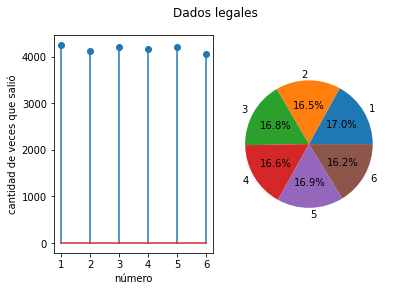

In [ ]:
def prob():
  uno=dos=tres=cuatro=cinco=seis=0 #inicializo variables
  n=0
  while n<=5000: #realizo 5000 muestras
    dice.roll(5)  #tiro los dados
    lista= dice.values
    #print(f'lista {str(lista):s}') #iba corroborando por partes el código que realizaba
    for i in lista: #voy por cada componente de la lista para sumar la cantidad de veces que aparece cada número por jugada.
      if i==1:
        uno += 1
      elif i==2:
        dos += 1
      elif i==3:
        tres += 1
      elif i==4:
        cuatro += 1
      elif i==5:
        cinco += 1
      else:
        seis += 1
    n +=1 #incremento
    num= [uno, dos, tres, cuatro, cinco, seis] #genero un nuevo vector con la cantidad que apareció cada número
  num2= ["1", "2", "3", "4", "5", "6"] #lo utilizo como serie de los gráficos
  
  #grafico
  plt.subplot(1,2,1)
  plt.xlabel('número')
  plt.ylabel('cantidad de veces que salió')
  plt.stem(num2, num) #utilizo un gráfico

  plt.subplot(1,2,2)
  plt.pie(num, labels=num2, autopct='%1.1f%%') #muestro porcentaje
    
  plt.subplots_adjust(wspace=0.1) #espacio entre lo graficos porque si no queda mal
  plt.suptitle("Dados legales")

  return plt.show()

prob()


# Greed Project

Greed es un juego de dados en los cuales se lanzan 5 dados para acumular puntos, tiene ciertas reglas para calcular el puntaje.

* Tres 1 suman 1000 puntos.
* Cada 1 adicional a una terna suma 100 puntos.
* Tres numeros iguales multiplican su valor por 100, por ejemplo tres 5 suman 500 puntos.
* Un 5 que no es parte de una terna suma 50 puntos.
* Todo lo demas vale 0 puntos.

Ejemplos:
````
score([1,1,1,5,1]) => 1150 puntos
score([2,3,4,6,2]) => 0 puntos
score([3,4,5,3,3]) => 350 puntos
score([1,5,1,2,4]) => 250 puntos
````

El objetivo es escribir este sistema de puntajes


In [ ]:
def score(lista):
    # Escribí el código necesario

  #inicializo todos los contadores en cero porque si no me saltaba error
  c1=c2=c3=c4=c5=c6=punt1=punt2=punt3=punt4=punt5=punt6=puntaje=0 
  for i in lista:
    if i==1:
      c1 += 1
      if c1==3:
        punt1= 1000        
      elif c1>3:
        punt1= 1000+(c1 -3)*100
      elif 0<c1<3:
        punt1= c1*100
      else:
        punt1= 0
    elif i==2:
      c2 += 1
      if c2>=3:
        punt2= 200
      else:
        punt2=0
    elif i==3:
      c3 += 1
      if c3>=3:
        punt3= 300
      else:
        punt3=0
    elif i==4:
      c4 += 1
      if c4>=3:
        punt4= 400
      else:
        punt4=0
    elif i==5:
      c5 += 1
      if c5==3:
        punt5= 500
      elif c5>3:
        punt5= 500+ (c5-3)*50
      else:
        punt5=c5*50
    else:
      c6 += 1
      if c6>=3:
        punt6= 600
      else:
        punt6=0        
  puntaje= punt1 + punt2 + punt3 + punt4 + punt5 + punt6
  #print(puntaje)
  return puntaje

### Quinto problema (2 puntos)
Aquí vamos a verificar si el sistema de puntuación funciona con algunas jugadas conocidas.

In [ ]:
assert(50 == score([5]))
assert(100 == score([1]))
assert(300 == score([1,5,5,1]))
assert(0 == score([2,3,4,6]))
assert(1000 == score([1,1,1]))
assert(200 == score([2,2,2]))
assert(300 == score([3,3,3]))
assert(400 == score([4,4,4]))
assert(500 == score([5,5,5]))
assert(600 == score([6,6,6]))
assert(250 == score([2,5,2,2,3]))
assert(550 == score([5,5,5,5]))
assert(1150 == score([1,1,1,5,1]))
assert(300 == score([1,2,2,2]))
assert(350 == score([1,5,2,2,2]))

### Sexto problema (2 puntos)
Usando la función "score" puntúa una jugada aleatoria de *Dice Project*, no te olvides de lanzar nuevamente los dados con ``dice.roll(5)``, mostrar sus valores y el puntaje obtenido.

In [ ]:
def sexto():
  a=[] #inicializo lista
  dice.roll(5) #tiro los dados
  a=dice.values #coloco los valores en la lista
  b=score(a) #llamo a la otra funcion
  return print(f'Sus dados son {str(a):s} y el puntaje obtenido es {str(b):s}')
sexto()


Sus dados son [1, 3, 1, 4, 4] y el puntaje obtenido es 200
